Alex Mei \\
CS 165B \\
Fall, 2021 \\

In [ ]:
# Imports
import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [ ]:
# Generate Linearly Separable Data
def generateCoordinate():
  return 100 * random.random() - 50

def generatePoint(dimensions: int):
  return [generateCoordinate() for i in range(dimensions)]

def generateLinearData(sampleSize: int, dimensions: int):
  newData = list()

  for i in range(sampleSize):
    newPoint = generatePoint(dimensions)

    # Choose target separation function at x = 0 axis
    newData.append((newPoint, 1 if newPoint[0] > 0 else -1))

  return newData

In [ ]:
def train_perceptron(training_data):
    '''
    Train a perceptron model given a set of training data
    :param training_data: A list of data points, where training_data[0]
    contains the data points and training_data[1] contains the labels.
    Labels are +1/-1.
    :return: learned model vector
    '''
    X = training_data[0]
    y = training_data[1]
    model_size = X.shape[1]
    w = np.zeros(model_size) #np.random.rand(model_size)
    iteration = 1
    while True:
        # compute results according to the hypothesis
        results = np.sign(np.multiply(np.matmul(X, w), y))

        # get incorrect predictions (you can get the indices)
        indices = np.arange(X.shape[0])
        misclassified_indices = indices[results != 1]

        # Check the convergence criteria (if there are no misclassified
        # points, the PLA is converged and we can stop.)
        if len(misclassified_indices) == 0:
            print("Total Iterations: {}".format(iteration))
            break

        # Pick one misclassified example.
        picked_misclassified = random.choice(misclassified_indices)
        x_star, y_star = X[picked_misclassified], y[picked_misclassified]

        # Update the weight vector with perceptron update rule
        w += y_star * x_star

        iteration += 1

    return w

In [ ]:
def make_prediction(model,data):
    '''
    Print the predictions given the dataset and the learned model.
    :param model: model vector
    :param data:  data points
    :return: nothing
    '''
    return np.sign(np.matmul(data,model))

In [ ]:
def calc_accuracy(predicted, actual):
  '''
  Calculate accuracy given predicted and actual labels.
  '''
  n = len(predicted)
  correct = sum([1 if predicted[i] == actual[i] else 0 for i in range(n)])
  return correct / n

In [ ]:
def runPLA(sampleSize: int, explore: bool = False):
  print("Running PLA for n = {}".format(sampleSize))

  dataList = generateLinearData(sampleSize, 2)
  x_vector = list()
  classes = list()

  for x, y in dataList:
    x_vector.append([1] + x)
    classes.append(y)

  if explore == True:
      # Scatter plot separated by classes
      plt.scatter(list(map(lambda x: x[1], x_vector)),
                  list(map(lambda x: x[2], x_vector)), 
                  c=np.array(list(map(lambda x: 'orange' if x > 0 else 'blue', classes))))

      # Target function line
      plt.plot([0, 0], [-50, 50], color="red")

      # Plot configs
      plt.xlabel("x_1")
      plt.ylabel("x_2")
      plt.title("Linearly Separable Data, n = {}".format(sampleSize))
      plt.xlim([-50, 50])
      plt.ylim([-50, 50])
      plt.legend(handles=[
                          mpatches.Patch(color='orange', label='h(x) = 1'), 
                          mpatches.Patch(color='blue', label='h(x) = -1'),
                          mpatches.Patch(color='red', label='target function f(x)'),
                          ])

      # Plot
      plt.show()
      plt.clf()

  trained_model = train_perceptron([np.array(x_vector), np.array(classes)])
  print("Model:", trained_model)
  print("Accuracy: {:.2f}".format(100 * calc_accuracy(make_prediction(trained_model, np.array(x_vector)), classes)))

  # Scatter plot separated by classes
  plt.scatter(list(map(lambda x: x[1], x_vector)),
              list(map(lambda x: x[2], x_vector)), 
              c=np.array(list(map(lambda x: 'orange' if x > 0 else 'blue', classes))))

  # Target function line
  plt.plot([0, 0], [-50, 50], color="red")

  # Hypothesis function line
  slope = -1 * trained_model[1] / trained_model[2]
  print("Slope: {:.2f}".format(slope))

  intercept = -1 * trained_model[0] / trained_model[2]
  plt.plot([-100, 100], [-100 * slope + intercept, 100 * slope + intercept], color="green")

  # Plot configs
  plt.xlabel("x_1")
  plt.ylabel("x_2")
  plt.title("Linearly Separable Data, n = {}".format(sampleSize))
  plt.xlim([-50, 50])
  plt.ylim([-50, 50])
  plt.legend(handles=[
                      mpatches.Patch(color='orange', label='h(x) = 1'), 
                      mpatches.Patch(color='blue', label='h(x) = -1'),
                      mpatches.Patch(color='green', label='hypothesis function g(x)'),
                      mpatches.Patch(color='red', label='target function f(x)'),
                      ])

  # Plot
  plt.show()

Running PLA for n = 20


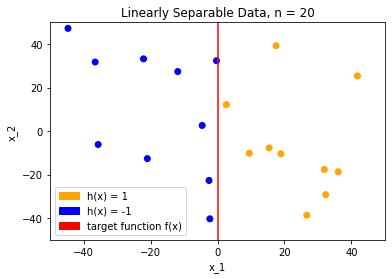

Total Iterations: 7
Model: [-2.         51.50474631 -2.20871281]
Accuracy: 100.00
Slope: 23.32


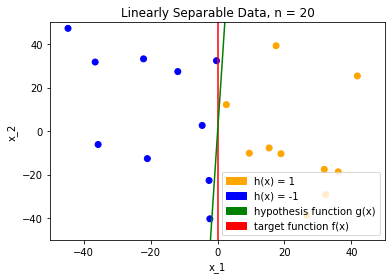

In [ ]:
runPLA(20, explore=True)

Running PLA for n = 20
Total Iterations: 7
Model: [ 4.         77.72187809 20.1084314 ]
Accuracy: 100.00
Slope: -3.87


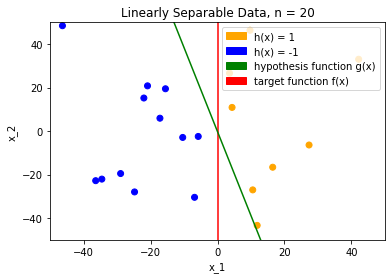

In [ ]:
runPLA(20)

Running PLA for n = 100
Total Iterations: 11
Model: [ 2.         93.39995182  2.52450638]
Accuracy: 100.00
Slope: -37.00


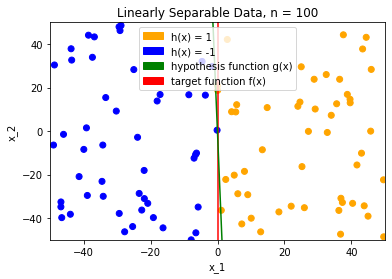

In [ ]:
runPLA(100)

Running PLA for n = 1000
Total Iterations: 42
Model: [-7.00000000e+00  1.67794955e+02 -1.02012915e-01]
Accuracy: 100.00
Slope: 1644.84


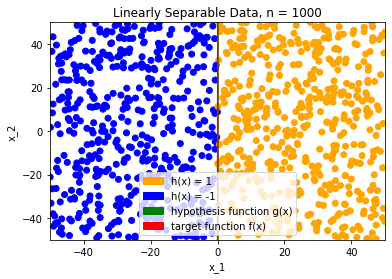

In [ ]:
runPLA(1000)